# Preprocessing and pipelines

## Preprocessing data

Scikit-learn will not accept categorical features by default. They are needed be encoded categorical features numerically. Binarize it by creating dummy variables.

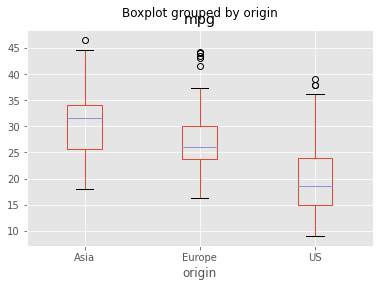

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0
...,...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,15.0,0,1
388,27.0,151.0,90,2950,17.3,10.0,0,1
389,29.5,98.0,68,2135,16.6,10.0,0,0
390,17.5,250.0,110,3520,16.4,15.0,0,1


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df = pd.read_csv("auto.csv")
df.boxplot("mpg", "origin")
plt.show()
df_origin = pd.get_dummies(df, drop_first=True)
df_origin

### Exploring categorical features

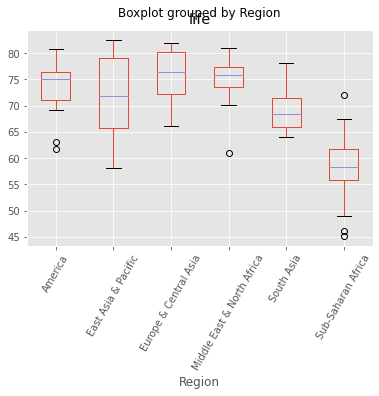

In [107]:
gapminder = pd.read_csv("gapminder.csv")
gapminder.boxplot("life", "Region", rot=60)
plt.show()

### Creating dummy variables

Before, the region column was deleted to fit. Now it will get dummies since feature contains very useful information that can predict life expectancy. 

In [108]:
df_region = pd.get_dummies(gapminder)
print(df_region.columns)
df_region = pd.get_dummies(gapminder, drop_first=True)
print(df_region.columns)
X = df_region.drop("life", axis=1)
y = df_region["life"]

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### Regression with categorical features

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## Handling missing data

### Dropping missing data 

In [109]:
import numpy as np
df = pd.read_csv("voting_records.csv", header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
df = df.replace("y", 1).replace("n", 0)
df[df=="?"] = np.nan
print(df.isnull().sum())
print("Shape of Original DataFrame: {}".format(df.shape))
df = df.dropna()
print("Shape of Original DataFrame: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of Original DataFrame: (232, 17)


Many values in the dataset are missing, dropping them may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. 

## Imputing missing data in a ML Pipeline I


There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline.

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

imp = SimpleImputer(missing_values="NaN", strategy="most_frequent")
clf = SVC()
steps = [("imputation", imp),("SVM", clf)]

### Imputing missing data in a ML Pipeline II

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

df = pd.read_csv("voting_records.csv", header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
df = df.replace("y", 1).replace("n", 0)
df[df=="?"] = np.nan
X = df.drop("party", axis=1)
y = df["party"]

steps = [("imputation", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
         ("SVM", SVC())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



## Centering and scaling

If the data's ranges vary widely (some feature are far larger scales than others) since some sklear models use distance (like k-NN) we want **similar scale**. -> normalizing, scaling and centering.

Standardization: Subtract mean and divide by variance (all features centered around 0 and have variance one.)

Subtract minimum and divide by the range of the data so data set has minimum zero and maximum one.

 ### Centering and scaling your data

 Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

In [122]:
df = pd.read_csv("white_wine.csv")
X = df.drop("quality",axis=1).values
y = df["quality"]
y = np.array([False if x > 5 else True for x in y.values])

from sklearn.preprocessing import scale
X_scaled = scale(X)
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))


Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

### Centering and scaling in a pipeline

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

steps = [("scaler", StandardScaler()),("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.3)
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


### Bringing it all together I: Pipeline for classification

In [127]:
from sklearn.model_selection import GridSearchCV

steps = [("scaler", StandardScaler()),("SVM", SVC())]
pipeline = Pipeline(steps)

parameters = {"SVM__C":[1, 10, 100],
             "SVM__gamma":[0.1, 0.01]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939
              precision    recall  f1-score   support

       False       0.83      0.85      0.84       662
        True       0.67      0.63      0.65       318

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### Bringing it all together II: Pipeline for regression

In [152]:
from sklearn.linear_model import ElasticNet

X = gapminder.drop(["life", "Region"], axis=1)
y = gapminder["life"]

steps = [("scaler", StandardScaler()),("elasticnet", ElasticNet())]
pipeline = Pipeline(steps)
parameters = {"elasticnet__l1_ratio":np.linspace(0, 1, 30)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
gm_cv = GridSearchCV(pipeline, parameters)
gm_cv.fit(X_train, y_train)
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896.5167846123923, tolerance: 0.558941590909091
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932.4892742484276, tolerance: 0.5893071666666667
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883.4834811281729, tolerance: 0.5890250303030303
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want 

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216
